In [1]:
import pandas as pd
df = pd.read_csv('peso-altura.csv', skiprows=2)
df.head()

,Unnamed: 0,Unnamed: 1,altura,peso,imc
0,NaN,Magui Bravi,"1,52","44,70","19,35"
1,NaN,Johanna,"1,54","55,00","23,19"
2,NaN,Alex Puccio,"1,57","56,00","22,72"
3,NaN,Camila Sol,"1,58","64,00","25,64"
4,NaN,Chachi Telesco,"1,61","52,80","20,37"


In [4]:
# Reemplaza las comas por puntos en las columnas necesarias
df['altura'] = df['altura'].str.replace(',', '.')
df['peso'] = df['peso'].str.replace(',', '.')
df['imc'] = df['imc'].str.replace(',', '.')

# Convierte las columnas al tipo de datos correspondiente
dtypes = {'Unnamed: 1': str, 'altura': float, 'peso': float, 'imc': float}
df = df.astype(dtypes)

# Muestra los tipos de datos después de la conversión
df.dtypes

Unnamed: 0    float64
Unnamed: 1     object
altura        float64
peso          float64
imc           float64
dtype: object

In [5]:
# Elimina la columna 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

# Muestra el DataFrame después de eliminar la colum df)
df.head()

,Unnamed: 1,altura,peso,imc
0,Magui Bravi,1.52,44.7,19.35
1,Johanna,1.54,55.0,23.19
2,Alex Puccio,1.57,56.0,22.72
3,Camila Sol,1.58,64.0,25.64
4,Chachi Telesco,1.61,52.8,20.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 1  26 non-null     object 
 1   altura      26 non-null     float64
 2   peso        26 non-null     float64
 3   imc         26 non-null     float64
dtypes: float64(3), object(1)
memory usage: 964.0+ bytes


In [7]:
print(df['Unnamed: 1'].unique())

['Magui Bravi' 'Johanna' 'Alex Puccio' 'Camila Sol' 'Chachi Telesco'
 'Inca' 'Melanie x' 'Belén Prieto' 'Constanza Yañez'
 'Florencia Provenzano' 'Lucía Brozo' 'Dechus' 'filetmignon' 'Luli Gia'
 'Desirée Delgado' 'Sarita Skleit' 'Jessica Gresty' 'Agustina Locke'
 'Ivana Nadal' 'Saldina Nurak' 'María Emilia B' 'Gabriela Alvez'
 'Esmeralda' 'Natasha Burnz' 'Jesica Gordon' 'Elisane Silva']


In [8]:
df = df.rename(columns={'Unnamed: 1': 'Nombre'})
df.head()

,Nombre,altura,peso,imc
0,Magui Bravi,1.52,44.7,19.35
1,Johanna,1.54,55.0,23.19
2,Alex Puccio,1.57,56.0,22.72
3,Camila Sol,1.58,64.0,25.64
4,Chachi Telesco,1.61,52.8,20.37


In [9]:
df.Nombre = df.Nombre.astype('string')
df.head()

,Nombre,altura,peso,imc
0,Magui Bravi,1.52,44.7,19.35
1,Johanna,1.54,55.0,23.19
2,Alex Puccio,1.57,56.0,22.72
3,Camila Sol,1.58,64.0,25.64
4,Chachi Telesco,1.61,52.8,20.37


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  26 non-null     string 
 1   altura  26 non-null     float64
 2   peso    26 non-null     float64
 3   imc     26 non-null     float64
dtypes: float64(3), string(1)
memory usage: 964.0 bytes


array([[<Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'peso'}>],
       [<Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

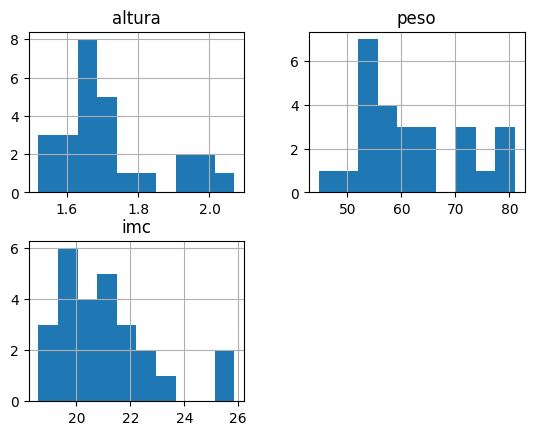

In [11]:
df.hist()

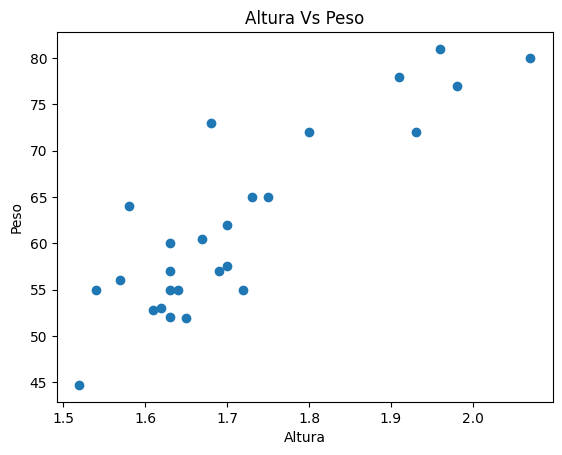

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x = df['altura'], y=df['peso'])
plt.title('Altura Vs Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()

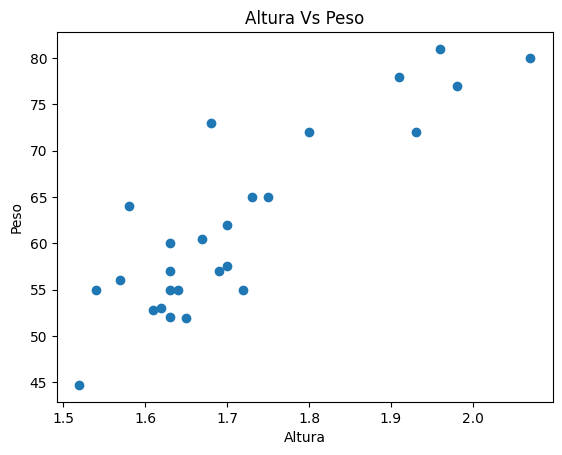

In [14]:
plt.scatter(x = df['altura'], y=df['peso'])
plt.title('Altura Vs Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()

In [31]:
df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)

In [41]:
df_test = df_test.drop('Nombre', axis=1)

In [33]:
etiquetas_train = df_train.pop('peso')
etiquetas_test = df_test.pop('peso')

In [37]:
df_train = df_train.drop('Nombre', axis=1)

In [20]:
etiquetas_test

Series([], Name: peso, dtype: float64)

In [42]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(df_train,etiquetas_train)

LinearRegression()

In [43]:
predicciones = modelo.predict(df_test)
predicciones

array([43.11879052, 65.37247898, 60.58717102, 57.64241095, 76.97704916])

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 104.481865
